# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style ='whitegrid')

# Reading Data Set using Pandas

In [2]:
data = pd.read_csv('Demographic_Data.csv')

# Analysis

In [3]:
#Check the first 5 rows of the data frame
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [4]:
#Column names
data.columns

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')

In [5]:
#Information about the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [6]:
#Measures of center on data provided
data.describe()

,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919670,2.675000
std,0.500003,15.715679,2.061238,721.273736,1.126672
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


## What inferences do I make after reviewing these describe() results?

The data contains 80,000 transactions.The mean for the region is 2.675 which indicates that there were more transactions in regions 3 and 4 than in regions 1 and 2.


In [7]:
#What type is the data
data.dtypes

in-store      int64
age           int64
items         int64
amount      float64
region        int64
dtype: object

In [8]:
#drop the duplicate rows
data = data.drop_duplicates()

In [9]:
#measures of centers on data after duplicates are removed.  Notice there were 80,000 lines and now there are 79,979.
# 21 duplicate lines were removed.
data.describe()

,in-store,age,items,amount,region
count,79979.000000,79979.000000,79979.000000,79979.000000,79979.000000
mean,0.500006,45.758512,4.505133,835.825727,2.674915
std,0.500003,15.715158,2.061250,721.263650,1.126642
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.120000,2.000000
50%,1.000000,45.000000,4.000000,582.140000,3.000000
75%,1.000000,56.000000,6.000000,1233.400000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [10]:
#Clean the data by looking for empty cells-no empty cells
print(data.isnull().sum())

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64


In [11]:
data.to_csv('Cleaned_Demographic_Data.csv')

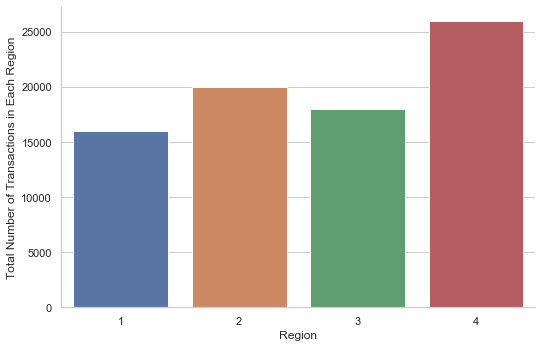

In [12]:
#use seborn to plot the count of transactions in each region
Numb_Region = sns.catplot('region', data = data, kind = 'count', aspect =1.5)
Numb_Region.set_xlabels('Region')
Numb_Region.set_ylabels('Total Number of Transactions in Each Region')

plt.show()

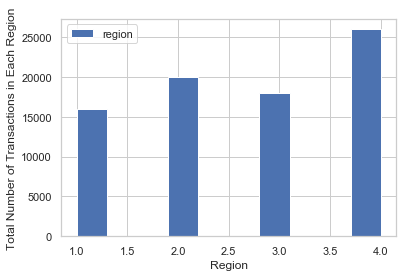

In [13]:
#same info using matplotlib
# Total number of transactions per region
data.plot.hist( y= 'region')
plt.xlabel("Region")
plt.ylabel("Total Number of Transactions in Each Region")

plt.show()

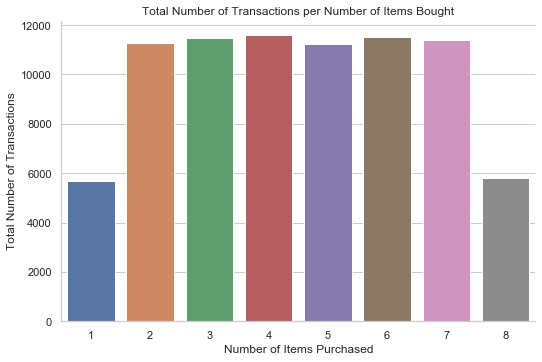

In [14]:
#Total number of each type where items purchased = 1, 2, ..., 7, 8
Num_Items = sns.catplot('items', data = data, kind = 'count', aspect =1.5)
Num_Items.set_xlabels('Number of Items Purchased')
Num_Items.set_ylabels("Total Number of Transactions")
plt.title('Total Number of Transactions per Number of Items Bought')

plt.show()

In [15]:
#I looked at all the information to choose what will help answer questions
data.groupby(['region']).describe()


in-store                                                   age  \
          count      mean       std  min  25%  50%  75%  max    count   
region                                                                  
1       15997.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  15997.0   
2       19994.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  19994.0   
3       18000.0  0.611056  0.487524  0.0  0.0  1.0  1.0  1.0  18000.0   
4       25988.0  0.500000  0.500010  0.0  0.0  0.5  1.0  1.0  25988.0   

                   ... items        amount                                    \
             mean  ...   75%  max    count         mean         std      min   
region             ...                                                         
1       43.704132  ...   6.0  8.0  15997.0   744.990939  492.989025  50.0500   
2       56.609083  ...   6.0  8.0  19994.0   252.097741  142.676946   5.0047   
3       45.646944  ...   6.0  8.0  18000.0   917.969637  751.409992  50.1320   
4       38.752424  ...   6.0  8.0  25988.0  1283.938357  756.302513  50.6000   

                                               
             25%       50%       75%      max  
region                                         
1       358.9900   662.860   973.490  1999.80  
2       129.6300   250.205   374.920   499.94  
3       372.9975   697.825  1134.550  3000.00  
4       659.4575  1230.250  1812.775  3000.00  

[4 rows x 32 columns]

In [16]:
#This table shows the mean in-store, age, items, and amount for each Region
data.groupby(['region']).mean()

,in-store,age,items,amount
region,,,,
1,1.000000,43.704132,4.510283,744.990939
2,0.000000,56.609083,4.512804,252.097741
3,0.611056,45.646944,4.494000,917.969637
4,0.500000,38.752424,4.503771,1283.938357


### Region 1 mean amount spent is 745
### Region 2 mean amount spent is 252
### Region 3 mean amount spent is 917
### Region 4 mean amount spent is 1284

In [17]:
#Collect Random Sample of 200 from 79,979 transactions
data_sample = data.sample(200)

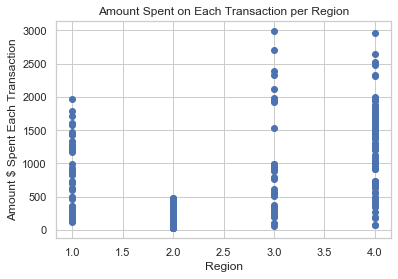

In [18]:
#Scatterplot showing 150 random points. 
#Each point in the region represents the $ amount spent on that transaction.
x = data_sample['region']
y = data_sample['amount']
plt.scatter(x,y, marker = 'o')
plt.xlabel("Region")
plt.ylabel("Amount $ Spent Each Transaction")
plt.title('Amount Spent on Each Transaction per Region')
plt.show()


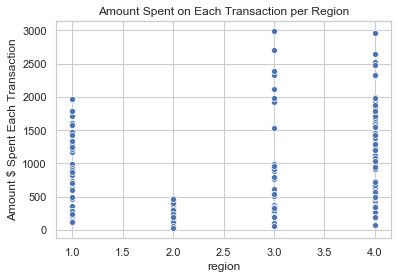

In [19]:
#Same as above using Seaborn
Amount_spent = sns.scatterplot(x = "region", y = "amount", data=data_sample)
plt.ylabel("Amount $ Spent Each Transaction")
plt.title('Amount Spent on Each Transaction per Region')
plt.show()

In [20]:
#So we can see all columns in the descibe dataframe
pd.set_option('display.max_columns', None)

In [21]:
#Now I grouped by Number of Items Purchase and looked at the mean, standard deviation and Quartiles
#This provided a lot of insight on total spent/items bought.
d=data.groupby(['items']).describe()
d.iloc[:,16:24]

amount                                                               \
         count        mean         std     min       25%      50%       75%   
items                                                                         
1       5699.0  825.401751  714.696664  5.3043  284.2200  571.980  1199.350   
2      11284.0  846.956834  730.064463  5.0604  283.7625  589.180  1263.050   
3      11486.0  836.594085  715.705233  5.0660  288.5600  590.655  1241.675   
4      11594.0  829.619594  722.440415  5.3136  284.7325  575.840  1206.250   
5      11233.0  833.973730  714.694293  5.6316  284.4700  584.380  1222.900   
6      11519.0  835.332638  723.661465  5.0047  281.0500  574.780  1251.000   
7      11376.0  830.026801  719.788395  5.3799  284.3700  576.645  1211.150   
8       5788.0  851.268593  729.749044  5.2610  290.7100  589.070  1269.100   

               
          max  
items          
1      2998.6  
2      2999.6  
3      2999.7  
4      2999.0  
5      2999.8  
6      2999.6  
7      3000.0  
8      3000.0

#the amount spent by the customer does not appear to change depending the number of items purchased.  The mean, sd, quartiles, max and min appear to be very similar.

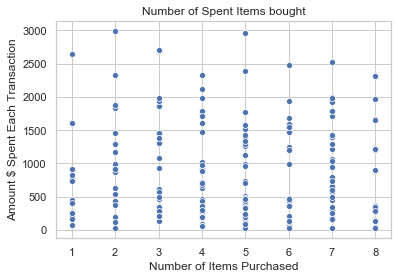

In [22]:
#Scatterplot showing sample of items bought and amount spent/transaction
Num_Items = sns.scatterplot(x = "items", y = "amount", data=data_sample)
plt.xlabel('Number of Items Purchased')
plt.ylabel("Amount $ Spent Each Transaction")
plt.title('Number of Spent Items bought')
plt.show()

In [23]:
data.groupby(['region']).count()

,in-store,age,items,amount
region,,,,
1,15997,15997,15997,15997
2,19994,19994,19994,19994
3,18000,18000,18000,18000
4,25988,25988,25988,25988


In [24]:
# Calculate Correlation
corr_mat = data.corr()
print(corr_mat)

          in-store       age     items    amount    region
in-store  1.000000 -0.178180 -0.003897 -0.085573 -0.133171
age      -0.178180  1.000000  0.000657 -0.282033 -0.235370
items    -0.003897  0.000657  1.000000  0.000384 -0.001904
amount   -0.085573 -0.282033  0.000384  1.000000  0.403486
region   -0.133171 -0.235370 -0.001904  0.403486  1.000000


##### What can we ascertain about 'region' and 'amount'?

##### Of all the features given to me.  The correlation between Region and Amount is the greatest.  However, I would use caution.  If regions were to change physcially or be renamed this correlation might not be true.  I.e.  If region 4 and region 2 swiched names.  The Correlation coefficient is 0.4.  Age and Amount are next at -0.28, then age and region at -0.23

######  Correlation between "items' and 'amount' is 0.000384  very little corelation.

In [25]:
#Calculate Covariance
cov_mat = data.cov()
print(cov_mat)

           in-store          age     items         amount      region
in-store   0.250003    -1.400071 -0.004017     -30.860425   -0.075019
age       -1.400071   246.966189  0.021270   -3196.782841   -4.167305
items     -0.004017     0.021270  4.248751       0.570791   -0.004421
amount   -30.860425 -3196.782841  0.570791  520221.252295  327.874873
region    -0.075019    -4.167305 -0.004421     327.874873    1.269321


#####  Covariance between region and amount is 327  which is positive.  This indicates that as the region gets larger.  1, 2, 3, 4, then the amount spent also increases.

###### Covariance between 'items' and 'amount' is 0.54.  Very close to 0.